# Day 1 Example

In [5]:
### 1.import library
import numpy as np
import pandas as pd

### 2.import dataset
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[ : , :-1].values   # iloc[row, col]
Y = dataset.iloc[ : , 3].values     # : 全部行 or 列; [a]第a行 or 列; [a,b,c]第 a,b,c 行 or 列

### 3.handle missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = "NaN", strategy = "mean", axis = 0)
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])   # complete nan

### 4.parse classification data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
X[:, 0] = labelencoder_x.fit_transform(X[:, 0])
#### create virtual variable
onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

### 5.split dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

### 6.feature scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

[[0.00000000e+00 1.00000000e+00 0.00000000e+00 4.00000000e+01
  6.37777778e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.70000000e+01
  6.70000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.70000000e+01
  4.80000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.87777778e+01
  5.20000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 4.80000000e+01
  7.90000000e+04]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 3.80000000e+01
  6.10000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 4.40000000e+01
  7.20000000e+04]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 3.50000000e+01
  5.80000000e+04]] [[0.0e+00 1.0e+00 0.0e+00 3.0e+01 5.4e+04]
 [0.0e+00 1.0e+00 0.0e+00 5.0e+01 8.3e+04]] [1 1 1 0 1 0 0 1] [0 0]
[[-1.          2.64575131 -0.77459667  0.26306757  0.12381479]
 [ 1.         -0.37796447 -0.77459667 -0.25350148  0.46175632]
 [-1.         -0.37796447  1.29099445 -1.97539832 -1.53093341]
 [-1.         -0.37796447  1.29099445  0.05261351 -1.111419

# Day 2 线性回归

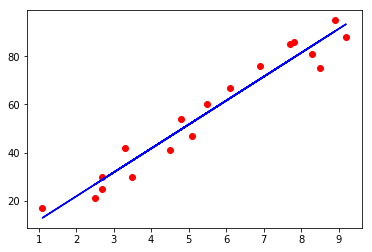

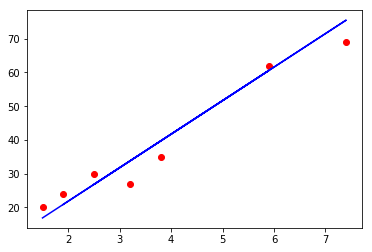

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
### data pre-processing
dataset = pd.read_csv('studentscores.csv')
X = dataset.iloc[:, :1].values
Y = dataset.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

### using linear regression train with train set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)

### predict result
Y_pred = regressor.predict(X_test)

### visualization
#### train set result visualization
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.show()
#### test set result visualization
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.show()

# Day 3 多元线性回归

In [3]:
import pandas as pd
import numpy as np
### 数据预处理
#### load dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 4].values
#### 类别数据数字化
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
#方法将类别与向量对应，例如{‘A’，‘B’，‘C’}分别与[1,0,0],[0,1,0],[0,0,1]对应，注意现在各个类别之间的欧式距离是相同的。
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
####躲避虚拟变量陷阱，n-1法
X = X[:, 1:]
####拆分数据集为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### 在训练集上训练多元线性回归模型
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

### 在测试集预测结果
y_pred = regressor.predict(X_test)
print(y_pred)
print(Y_test)

[103015.20159796 132582.27760815 132447.73845175  71976.09851258
 178537.48221056 116161.24230166  67851.69209676  98791.73374687
 113969.43533013 167921.06569551]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


# Day4 逻辑回归

/opt/python/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


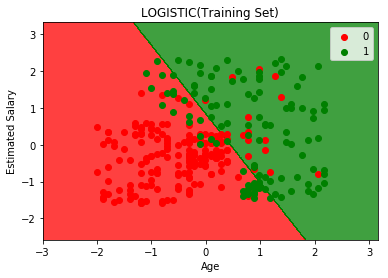

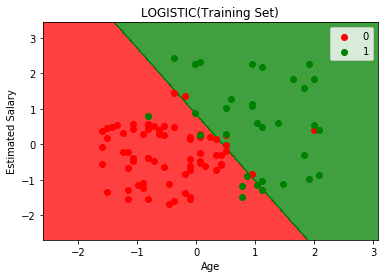

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
###数据预处理
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
Y = dataset.iloc[:, 4].values
####将数据集分为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
####特性缩放
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

###逻辑回归模型[]
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

###预测测试集结果
Y_pred = classifier.predict(X_test)

###评估预测
####生成混淆矩阵
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
####可视化
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j, 0], X_set[Y_set==j, 1],
               c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('LOGISTIC(Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

X_set, Y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:,0].max()+1, step=0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set==j, 0], X_set[Y_set==j, 1],
               c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('LOGISTIC(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()